In [1]:
#**************************************************************************************************************************************
#                                                                                                                                     *
#                                  Principle Component Analysis (PCA) with TensorFlow                                                 *
#                                                                                                                                     *
#     - This script implements Principal Component Analysis (PCA) using TensorFlow for dimensionality reduction.                      *
#     - The PCAAlgorithm class standardizes the input data, computes the covariance matrix, and performs eigenvalue decomposition     *
#       to extract the principal components that capture the most variance in the data.                                               *
#     - The script includes functions to visualize the transformed data, the explained variance of each principal component,          *
#       and the cumulative explained variance, helping to understand the contribution of each component to the total variance.        *
#     - Additionally, a sample dataset is loaded, and the PCA transformation is applied and visualized.                               *
#                                                                                                                                     *
#**************************************************************************************************************************************


In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [3]:
class PCAAlgorithm:
    def __init__(self, n_components):
        self.n_components = n_components
        self.components = None
        self.explained_variance = None
        self.scaler = StandardScaler()
        self.X_scaled = None
        self.cov_matrix = None

    def fit(self, X):
        self.X_scaled = self.scaler.fit_transform(X)                                                          # Standardizing the data


        X_tf = tf.convert_to_tensor(self.X_scaled, dtype=tf.float32)                                          # Convert to TensorFlow tensor


        mean_X_tf = tf.reduce_mean(X_tf, axis=0)                                                              # Calculate the covariance matrix
        X_centered_tf = X_tf - mean_X_tf
        self.cov_matrix = tf.matmul(tf.transpose(X_centered_tf), X_centered_tf) / tf.cast(tf.shape(X_centered_tf)[0] - 1, tf.float32)


        eigvals, eigvecs = tf.linalg.eigh(self.cov_matrix)                                                    # Calculate eigenvalues and eigenvectors


        sorted_indices = tf.argsort(eigvals, direction='DESCENDING')                                          # Sort eigenvectors based on eigenvalues
        self.components = tf.gather(eigvecs, sorted_indices[:self.n_components], axis=1).numpy()
        self.explained_variance = tf.gather(eigvals, sorted_indices[:self.n_components]).numpy() / tf.reduce_sum(eigvals).numpy()

        # Print components and explained variance
        print("\n\n*****************************************************************************************************************************")
        print("Standardized Data (First 5 rows):")
        print(self.X_scaled[:5])
        print("\n\n*****************************************************************************************************************************")
        print("Covariance Matrix of Standardized Data:")
        print(self.cov_matrix.numpy())
        print("\n\n*****************************************************************************************************************************")
        print("Principal Components:")
        print(self.components)
        print("\n\n*****************************************************************************************************************************")
        print("Explained Variance Ratio:")
        print(self.explained_variance)
        print("\n\n*****************************************************************************************************************************\n\n")

    def transform(self, X):
        X_scaled = self.scaler.transform(X)                                                                   # Standardize the input data
        X_tf = tf.convert_to_tensor(X_scaled, dtype=tf.float32)                                               # Convert standardized data to TensorFlow tensor
        transformed_data = tf.matmul(X_tf, self.components).numpy()                                           # Perform matrix multiplication to transform data using principal components
        return transformed_data


In [4]:
def banner():
    print("""
******************************************************************************************************************************
*                                         Principal Component Analysis (PCA)                                                 *
*                                                                                                                            *
*     Principal Component Analysis (PCA) is an unsupervised dimensionality reduction technique used to find the              *
*     directions (principal components) that maximize the variance in the data. PCA projects the data onto a lower           *
*     dimensional subspace while retaining the most important variance in the dataset.                                       *
*                                                                                                                            *
*             - Components: Directions maximizing the variance in the data                                                   *
*             - Explained Variance: Ratio of variance explained by each component                                            *
*             - Standardized Data: Data after standardization                                                                *
*             - Covariance Matrix: Covariance matrix of the standardized data                                                *
*                                                                                                                            *
*     PCA is particularly useful for reducing the dimensionality of data while retaining the most informative features,      *
*     and for visualizing high-dimensional data in lower dimensions.                                                         *
*                                                                                                                            *
*     Usage:                                                                                                                 *
*             1. Load your dataset into a pandas DataFrame.                                                                  *
*             2. Extract features from the dataset.                                                                          *
*             3. Initialize the PCAAlgorithm class with the number of components (n_components) to retain.                   *
*             4. Fit the PCA model using the 'fit' method with your data matrix X.                                           *
*             5. Transform the data into the new feature space using the 'transform' method.                                 *
*             6. Visualize the results using the provided plotting functions.                                                *
*             7. Experiment with different values of n_components to find the optimal number of dimensions for your          *
*                analysis.                                                                                                   *
*                                                                                                                            *
******************************************************************************************************************************
    """)


banner()
dataset = pd.read_csv("heart_statlog_cleveland_hungary_final.csv")                                            # Load the dataset
X = dataset.drop(columns=["target"]).values                                                                   # Extract features
y = dataset["target"].values                                                                                  # Extract labels
pca = PCAAlgorithm(n_components=2)                                                                            # Initialize and fit PCA
pca.fit(X)
X_pca = pca.transform(X)


******************************************************************************************************************************
*                                         Principal Component Analysis (PCA)                                                 *
*                                                                                                                            *
*     Principal Component Analysis (PCA) is an unsupervised dimensionality reduction technique used to find the              *
*     directions (principal components) that maximize the variance in the data. PCA projects the data onto a lower           *
*     dimensional subspace while retaining the most important variance in the dataset.                                       *
*                                                                                                                            *
*             - Components: Directions maximizing the variance in the data                                    

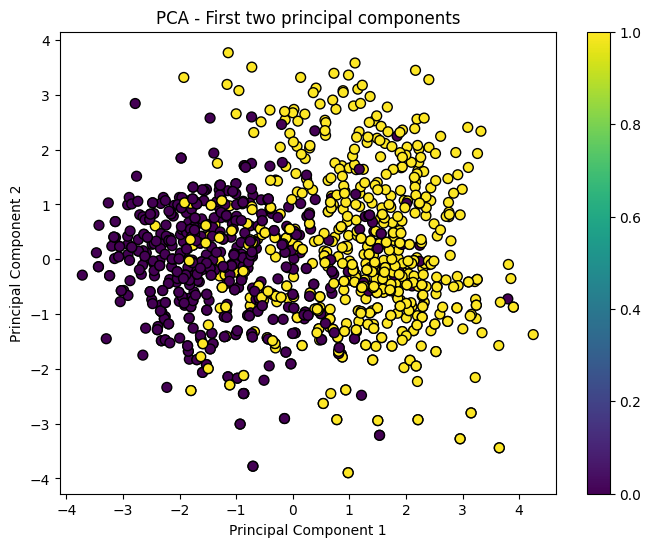

In [5]:
def plot_scatter_pca(X_pca, y):
    plt.figure(figsize=(8, 6))
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('PCA - First two principal components')
    plt.colorbar()
    plt.show()


plot_scatter_pca(X_pca, y)

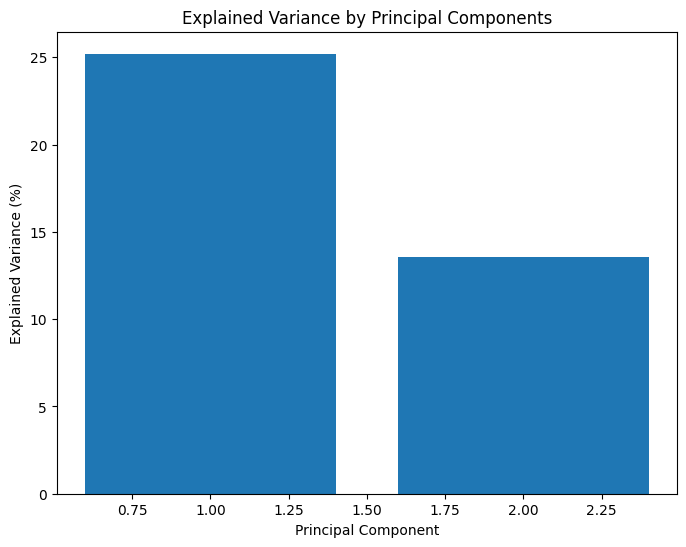

In [6]:
def plot_explained_variance(pca):
    plt.figure(figsize=(8, 6))
    plt.bar(range(1, len(pca.explained_variance)+1), pca.explained_variance * 100)
    plt.xlabel('Principal Component')
    plt.ylabel('Explained Variance (%)')
    plt.title('Explained Variance by Principal Components')
    plt.show()


plot_explained_variance(pca)

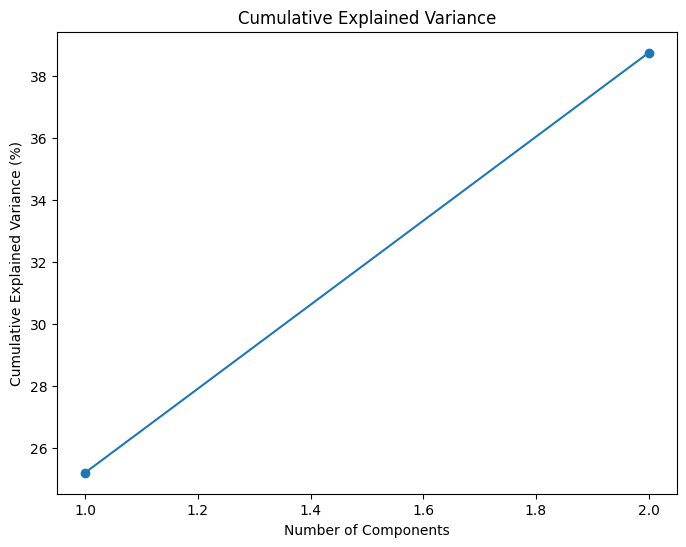

In [7]:
def plot_cumulative_explained_variance(pca):
    plt.figure(figsize=(8, 6))
    plt.plot(range(1, len(pca.explained_variance)+1), np.cumsum(pca.explained_variance) * 100, marker='o')
    plt.xlabel('Number of Components')
    plt.ylabel('Cumulative Explained Variance (%)')
    plt.title('Cumulative Explained Variance')
    plt.show()


plot_cumulative_explained_variance(pca)